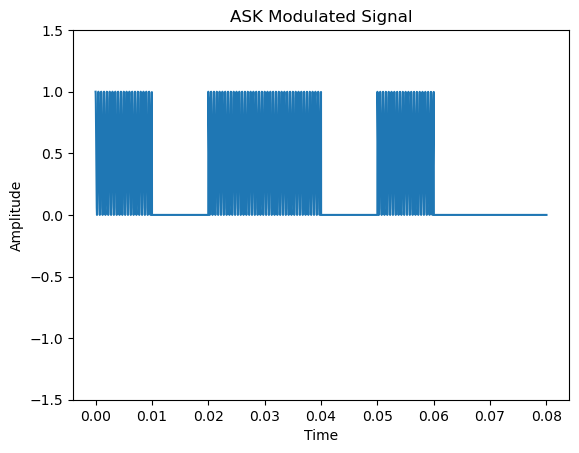

Demodulated bits: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ask_modulate(bits, carrier_frequency, symbol_rate, amplitude):
    t = np.linspace(0, len(bits) / symbol_rate, len(bits) * 1000)
    carrier = np.cos(2 * np.pi * carrier_frequency * t)

    signal = []
    for bit in bits:
        if bit == 0:
            signal.extend(np.zeros(len(t) // len(bits)))
        else:
            signal.extend(amplitude * np.cos(2 * np.pi * carrier_frequency * t[:len(t) // len(bits)]))

    return np.multiply(carrier, signal)

def ask_demodulate(signal, carrier_frequency, symbol_rate):
    t = np.linspace(0, len(signal) / symbol_rate, len(signal))
    carrier = np.cos(2 * np.pi * carrier_frequency * t)
    demodulated_signal = np.multiply(signal, carrier)
    demodulated_bits = []

    samples_per_bit = len(demodulated_signal) // len(t)
    for i in range(0, len(demodulated_signal), samples_per_bit):
        if np.sum(demodulated_signal[i:i+samples_per_bit]) > 0:
            demodulated_bits.append(1)
        else:
            demodulated_bits.append(0)

    return demodulated_bits

def plot_signal(signal, time, title):
    plt.plot(time, signal)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.ylim([-1.5, 1.5])  # Adjust the y-axis limits if needed
    plt.show()

# Example usage
bits = [1, 0, 1, 1, 0, 1, 0, 0]  # Replace with your own bit sequence
carrier_frequency = 1000  # Replace with the desired carrier frequency in Hz
symbol_rate = 100  # Replace with the desired symbol rate in symbols per second
amplitude = 1  # Replace with the desired amplitude

# Modulation
modulated_signal = ask_modulate(bits, carrier_frequency, symbol_rate, amplitude)
time = np.linspace(0, len(bits) / symbol_rate, len(modulated_signal))
plot_signal(modulated_signal, time, 'ASK Modulated Signal')

# Demodulation
demodulated_bits = ask_demodulate(modulated_signal, carrier_frequency, symbol_rate)
print("Demodulated bits:", demodulated_bits)
